<a href="https://colab.research.google.com/github/vinayhpandya/onefourthlabscode/blob/master/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting the sigmoid function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(w,x,b):
  return (1/(1+np.exp(-(np.dot(w,x)+b))))

In [134]:
sigmoid(1,0.5,0)

0.6224593312018546

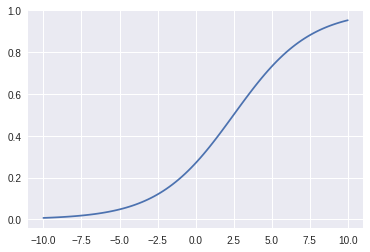

In [135]:
w = 0.4 #@param {type:"slider", min:-1, max:1,step:0.1}
b=-1 #@param {type: "slider", min: -2, max: 10,step:1}
x=np.linspace(-10,10,100)
y=sigmoid(w,x,b)
plt.plot(x,y)
plt.show()

# Plotting sigmoid 3D

$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [0]:
def sigmoid2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [137]:
print(sigmoid2d(1,0,0.5,0,0))

0.6224593312018546


In [0]:
from mpl_toolkits.mplot3d import Axes3D 

In [0]:
from mpl_toolkits import mplot3d

In [0]:
%matplotlib inline

In [141]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)
print(XX1.shape,XX2.shape)

(100, 100) (100, 100)


In [0]:
YY1=sigmoid2d(XX1,XX2,0.7,0.7,0)

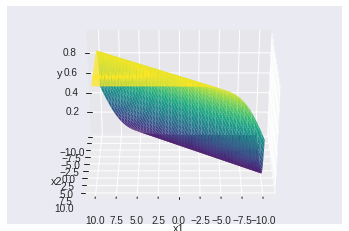

In [143]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, YY1, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30,90)

# Compute loss for a given dataset

In [0]:
X=np.random.random(25)*20-10
Y=sigmoid(X,0.5,0.25)

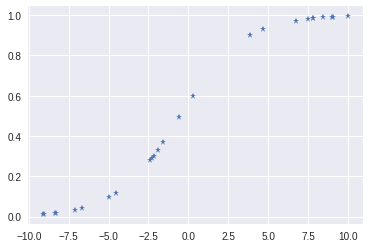

In [145]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def loss(X,Y,W_est,b_est):
  loss_value=0
  for x,y in zip(X,Y):
    loss_value+=(y-sigmoid(x,W_est,b_est))**2
  return loss_value

In [0]:
W=np.linspace(-1,1,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)

In [148]:
BB.shape

(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j]=loss(X,Y,WW[i,j],BB[i,j])

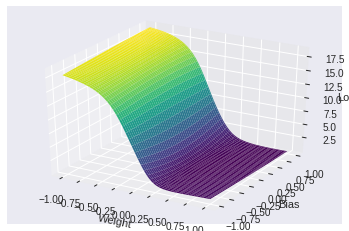

In [150]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss');
#ax.view_init(30,270)

In [0]:
ij=np.argmin(Loss)

In [0]:
i=np.floor(ij/100)
j=ij-i*Loss.shape[1]

In [153]:
print(i ,j)

62.0 74.0


In [154]:
print(WW[62,74],BB[62,74])

0.49494949494949503 0.2525252525252526


# Contour Plots

In [0]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","Green"])

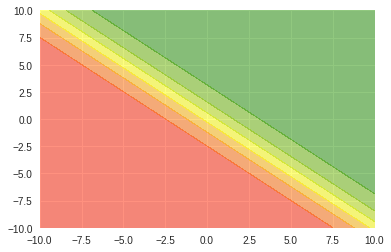

In [156]:
plt.contourf(XX1,XX2,YY1,cmap=my_cmap,alpha=0.5)

# class for sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

#Fit For Toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
Sg=SigmoidNeuron()

In [0]:
Sg.fit(X,Y)

In [161]:
print(Sg.w,Sg.b)

[[ 1.73551733 -0.38236377]] [-0.09985359]


In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = Sg.sigmoid(Sg.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()
  

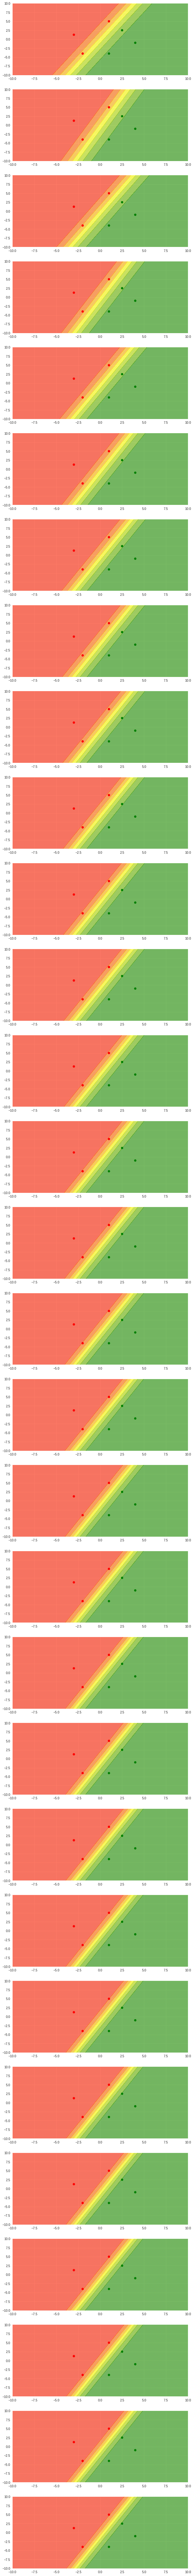

In [163]:
Sg.fit(X,Y,1,0.05,True)
N=30
plt.figure(figsize=(10,150))
for i in range(N):
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, Sg, ax)
  Sg.fit(X, Y, 1, 0.5, False)

In [164]:
!ls

mobile_cleaned-1551253091700.csv  sample_data


In [165]:
!ls

mobile_cleaned-1551253091700.csv  sample_data


In [0]:
data=pd.read_csv('mobile_cleaned-1551253091700.csv')

In [167]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [168]:
data.shape

(341, 88)

In [0]:
data['Class']=(data['Rating']>=4).astype(np.int)

In [0]:
X=data.drop(['Rating','Class'],axis=1)

In [171]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [0]:
Y=data['Class'].copy()

In [173]:
print(X.shape,Y.shape)

(341, 87) (341,)


In [174]:
data['Class']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
311    1
312    0
313    1
314    1
315    1
316    0
317    0
318    0
319    0
320    1
321    1
322    1
323    1
324    0
325    0
326    1
327    1
328    1
329    0
330    0
331    1
332    1
333    0
334    0
335    1
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [0]:
Y_train=data['Class'].values

In [176]:
data['Class'].value_counts(normalize=True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

In [0]:
Y_binarised=data['Class'].values

In [178]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

# Standardizing the data

In [0]:
r=np.random.random([100,1])

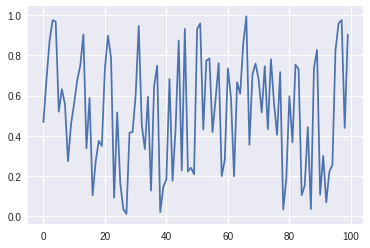

In [180]:
plt.plot(r)
plt.show()

In [181]:
np.std(r)

0.2824227617212049

In [0]:
scaler=StandardScaler()

In [183]:
scaler.fit_transform(r)

array([[-1.74868628e-01],
       [ 5.86043635e-01],
       [ 1.25555821e+00],
       [ 1.62058204e+00],
       [ 1.59371987e+00],
       [ 1.01530345e-02],
       [ 4.07457864e-01],
       [ 1.47211069e-01],
       [-8.59710217e-01],
       [-2.00294499e-01],
       [ 1.60450540e-01],
       [ 5.67225208e-01],
       [ 8.26409489e-01],
       [ 1.36885975e+00],
       [-6.32636347e-01],
       [ 2.49461389e-01],
       [-1.45765796e+00],
       [-8.64736224e-01],
       [-5.02141455e-01],
       [-5.91361833e-01],
       [ 7.73051717e-01],
       [ 1.34668410e+00],
       [ 9.57078524e-01],
       [-1.50057846e+00],
       [-7.66152165e-04],
       [-1.24948228e+00],
       [-1.70515579e+00],
       [-1.78555798e+00],
       [-3.56840315e-01],
       [-3.46578097e-01],
       [ 2.96522175e-01],
       [ 1.51810341e+00],
       [-2.27534469e-01],
       [-6.45791330e-01],
       [ 2.73074058e-01],
       [-1.37585089e+00],
       [ 4.56742897e-01],
       [ 8.19995761e-01],
       [-1.7

In [184]:
np.mean(r)

0.5163852711241246

In [185]:
np.std(r)

0.2824227617212049

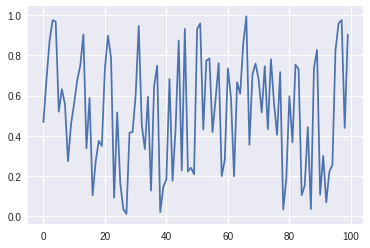

In [186]:
plt.plot(r)
plt.show()

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X.values,Y.values,random_state=123,stratify=Y.values)

In [188]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler=StandardScaler()

In [0]:
X_scaled_train=scaler.fit_transform(X_train)

In [0]:
X_scaled_test=scaler.transform(X_test)